In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df_index=pd.read_csv("heart.csv")


In [4]:
df_index.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df_index.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

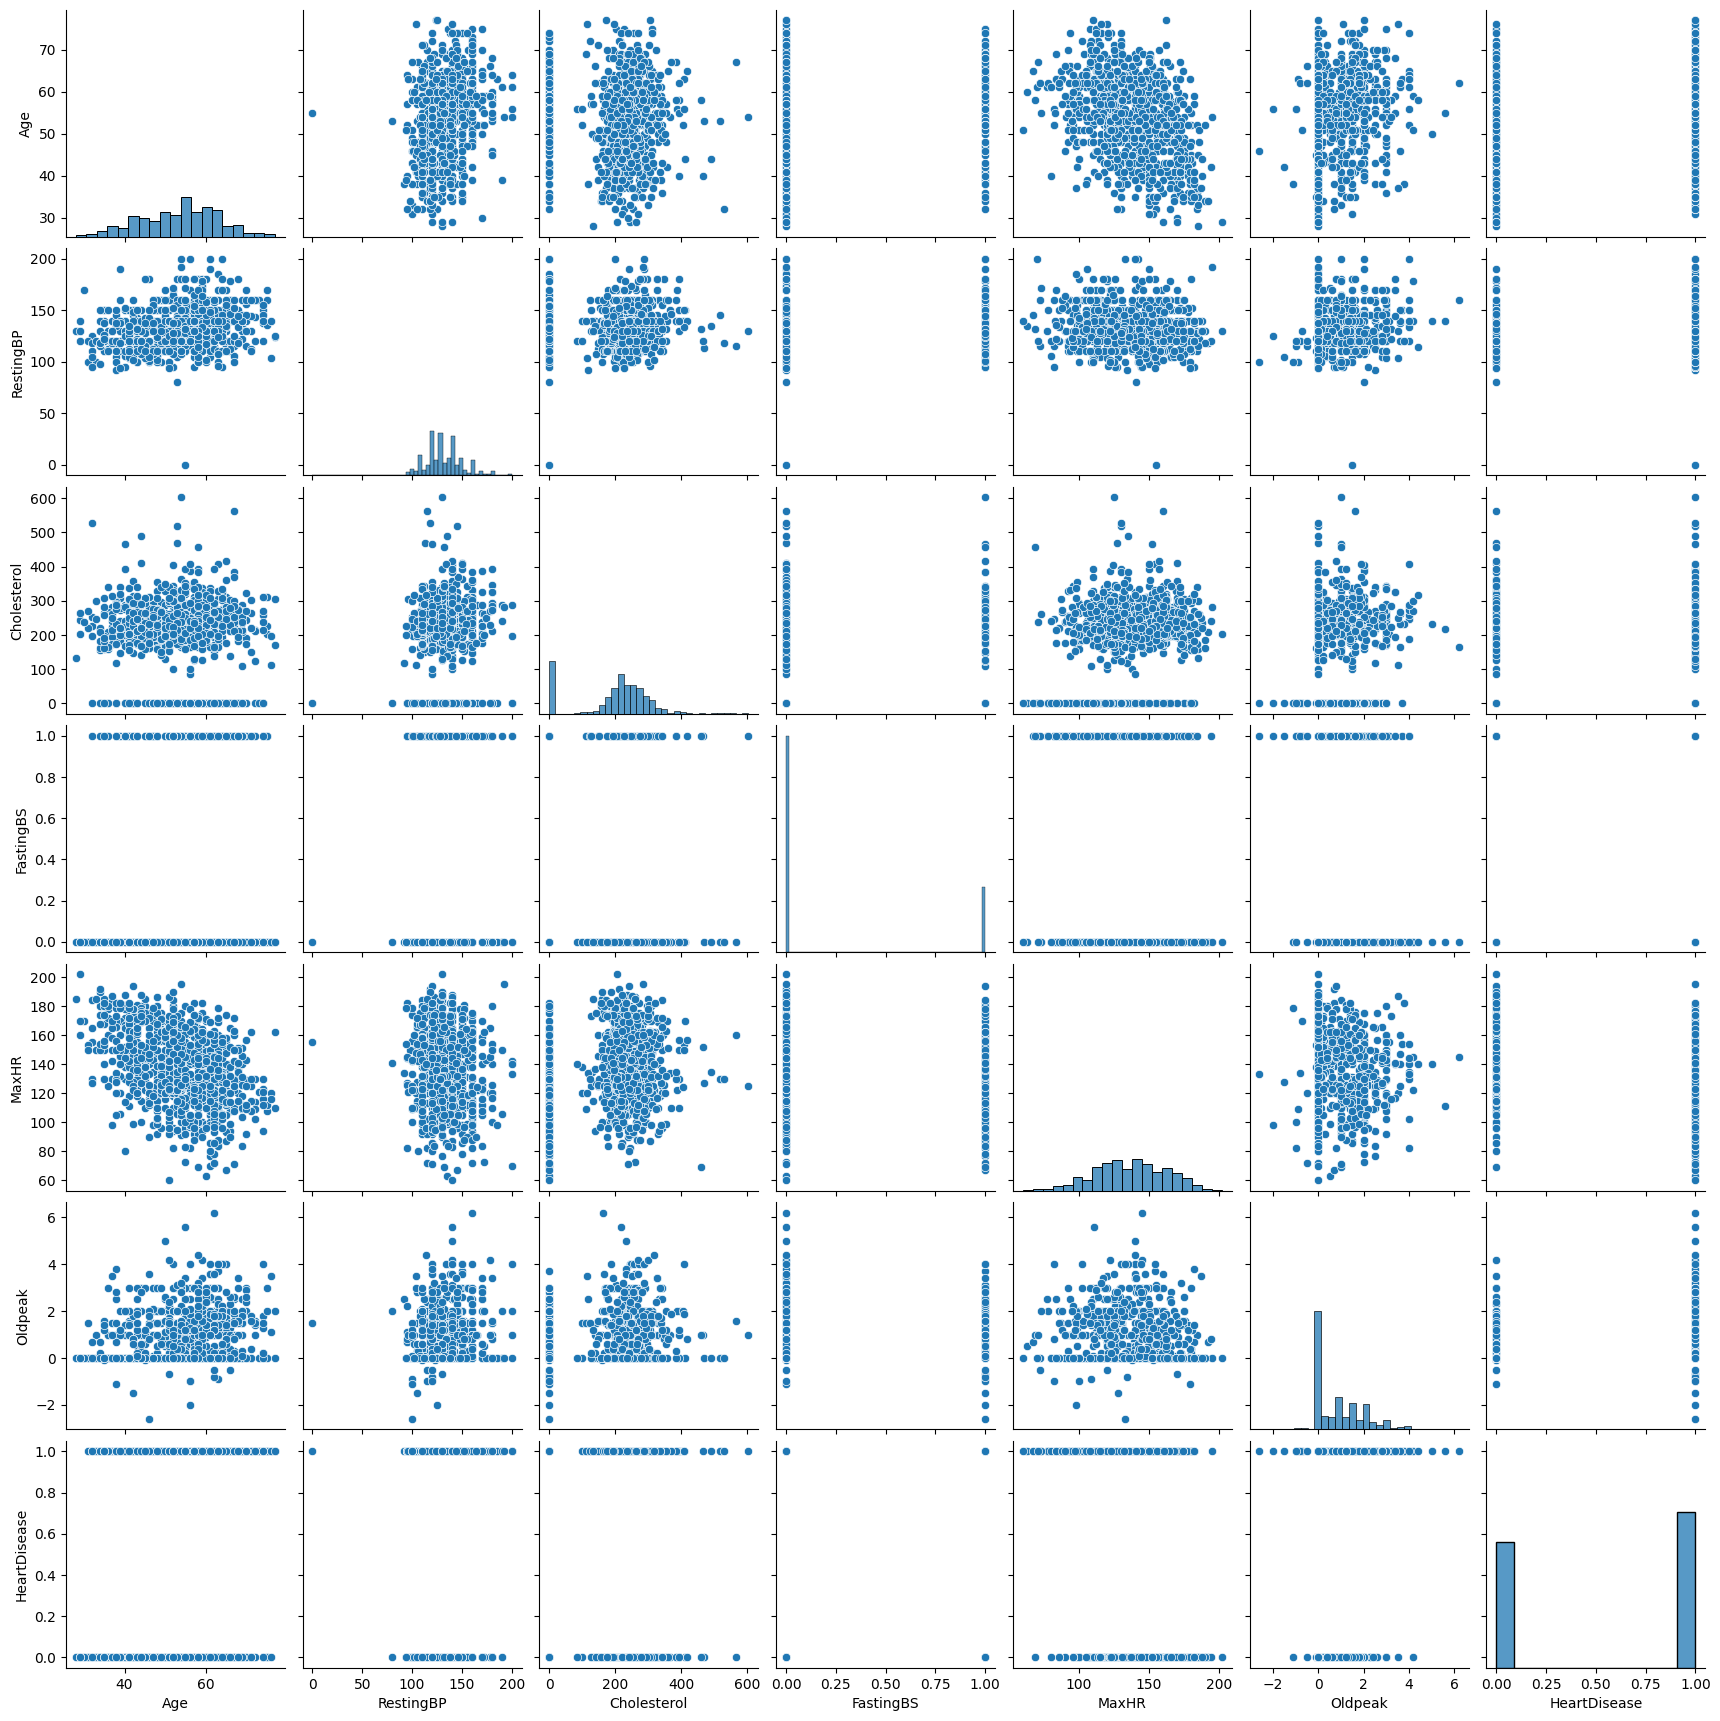

In [6]:
import seaborn as sns
sns.pairplot(df_index)

In [7]:
x=df_index[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y=df_index['HeartDisease']

In [8]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [9]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test_split=train_test_split(x,y,test_size=0.23,random_state=42)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:

encoder = LabelEncoder()
df_index=pd.read_csv("heart.csv")
x=df_index[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y=df_index['HeartDisease']
for col in x.select_dtypes(include=['object']).columns:
    x.loc[:, col] = encoder.fit_transform(x[col])

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.23, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8632075471698113

Confusion Matrix:
 [[ 79  11]
 [ 18 104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        90
           1       0.90      0.85      0.88       122

    accuracy                           0.86       212
   macro avg       0.86      0.87      0.86       212
weighted avg       0.87      0.86      0.86       212



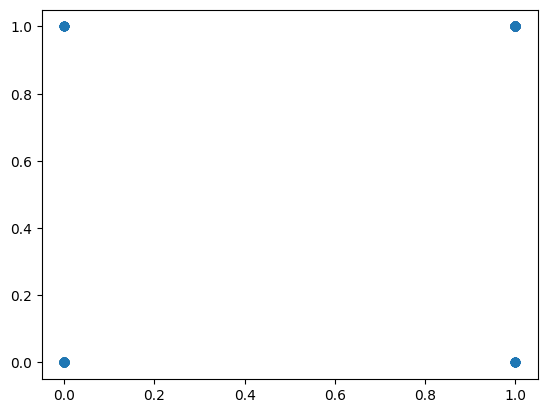

In [13]:
plt.scatter(y_test,y_pred)

In [14]:

print(model.coef_)

[[ 0.13395049  0.5170909  -0.56160366  0.04755424 -0.45857878  0.41308073
  -0.14550478 -0.17708192  0.603791    0.49240765 -1.02263203]]


hyperparameter tuning for logistic regression


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


Random Forest Test Accuracy: 0.8915094339622641

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        90
           1       0.90      0.91      0.91       122

    accuracy                           0.89       212
   macro avg       0.89      0.89      0.89       212
weighted avg       0.89      0.89      0.89       212



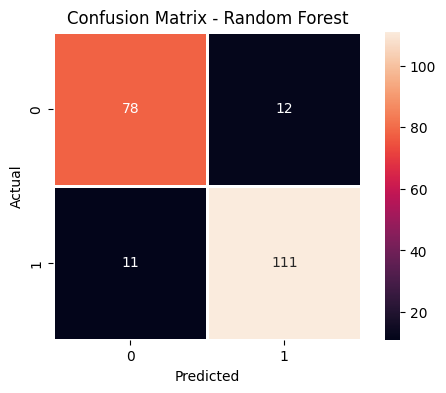

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
rf_model = RandomForestClassifier(
    n_estimators=200,  
    max_depth=None,
    random_state=42
)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

print("Random Forest Test Accuracy:", accuracy_score(y_test, rf_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))

cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", linewidths=1, square=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost + SMOTE Accuracy: 0.8726415094339622

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86        90
           1       0.91      0.86      0.89       122

    accuracy                           0.87       212
   macro avg       0.87      0.87      0.87       212
weighted avg       0.88      0.87      0.87       212



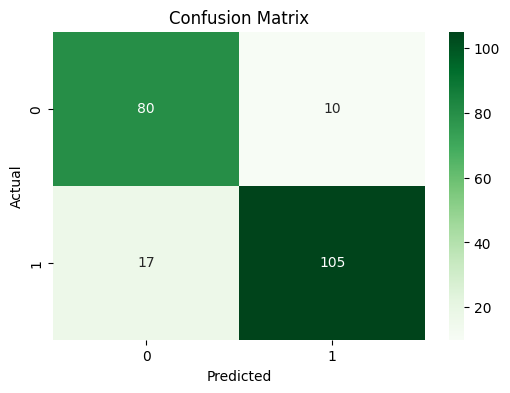

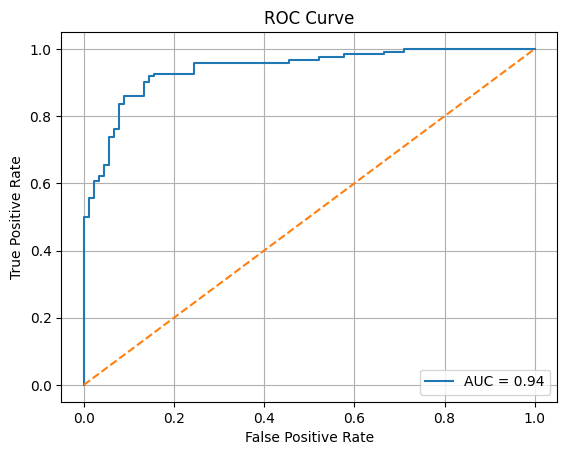

In [17]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

df_index = pd.read_csv("heart.csv")


encoder = LabelEncoder()
for col in df_index.select_dtypes(include=['object']).columns:
    df_index[col] = encoder.fit_transform(df_index[col])


x=df_index[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y=df_index['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)
xgb.fit(x_train_sm, y_train_sm)

y_pred = xgb.predict(x_test)
y_prob = xgb.predict_proba(x_test)[:, -1]
print("XGBoost + SMOTE Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="AUC = %.2f" % roc_auc_score(y_test, y_prob))
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()


Ridge Model Accuracy: 0.8632075471698113

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        90
           1       0.90      0.85      0.88       122

    accuracy                           0.86       212
   macro avg       0.86      0.87      0.86       212
weighted avg       0.87      0.86      0.86       212



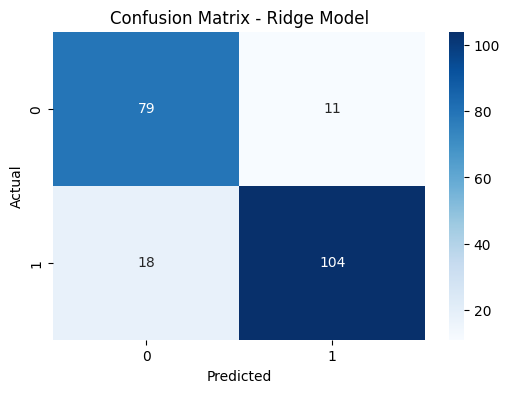

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df_index = pd.read_csv("heart.csv")

encoder = LabelEncoder()
for col in df_index.select_dtypes(include=['object']).columns:
    df_index[col] = encoder.fit_transform(df_index[col])

x=df_index[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y=df_index['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.23, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

ridge_model = LogisticRegression(
    penalty='l2',    
    solver='lbfgs',
    C=1.0,            
    max_iter=1000,
    random_state=42
)

ridge_model.fit(x_train, y_train)
ridge_pred = ridge_model.predict(x_test)

print("Ridge Model Accuracy:", accuracy_score(y_test, ridge_pred))
print("\nClassification Report:\n", classification_report(y_test, ridge_pred))
cm = confusion_matrix(y_test, ridge_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ridge Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Milestone 2


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.pipeline import Pipeline  
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.calibration import calibration_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    classification_report, roc_curve, ConfusionMatrixDisplay
)
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder   
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")


In [20]:
numeric_features = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
categorical_features = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]


In [21]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [22]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [23]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])
logreg_pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(n_estimators=200, random_state=42))
])
rf_pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [25]:
nn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", MLPClassifier(hidden_layer_sizes=(32,16), max_iter=1000, random_state=42))
])
nn_pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [26]:
svm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", SVC(probability=True, random_state=42))
])
svm_pipeline.fit(x_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [27]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:,1]
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


In [28]:
print("Logistic Regression Results:")
evaluate(logreg_pipeline, x_test, y_test)

print("\nRandom Forest Results:")
evaluate(rf_pipeline, x_test, y_test)

print("\nSVM Results:")
evaluate(svm_pipeline, x_test, y_test)

print("\nNeural Network Results:")
evaluate(nn_pipeline, x_test, y_test)


Logistic Regression Results:
Accuracy: 0.8532608695652174
Precision: 0.9
Recall: 0.8411214953271028
F1 Score: 0.8695652173913043
ROC-AUC: 0.9274183760165069

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Confusion Matrix:
[[67 10]
 [17 90]]

Random Forest Results:
Accuracy: 0.8858695652173914
Precision: 0.9134615384615384
Recall: 0.8878504672897196
F1 Score: 0.9004739336492891
ROC-AUC: 0.943196989925962

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88   

In [29]:
voting_clf = VotingClassifier(
    estimators=[
        ("lr", logreg_pipeline),
        ("rf", rf_pipeline),
        ("svm", svm_pipeline),
        ("nn", nn_pipeline)
    ],
    voting="soft",
    n_jobs=-1
)

voting_clf.fit(x_train, y_train)


,estimators,"[('lr', ...), ('rf', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None


In [30]:
y_pred_vote = voting_clf.predict(x_test)
y_proba_vote = voting_clf.predict_proba(x_test)[:,1]

print(" Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print("Precision:", precision_score(y_test, y_pred_vote))
print("Recall:", recall_score(y_test, y_pred_vote))
print("F1 Score:", f1_score(y_test, y_pred_vote))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_vote))


 Voting Classifier
Accuracy: 0.8641304347826086
Precision: 0.9019607843137255
Recall: 0.8598130841121495
F1 Score: 0.8803827751196173
ROC-AUC: 0.9427114941133632


In [31]:
stacking_clf = StackingClassifier(
    estimators=[
        ("rf", rf_pipeline),
        ("svm", svm_pipeline),
        ("nn", nn_pipeline)
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)

stacking_clf.fit(x_train, y_train)


,estimators,"[('rf', ...), ('svm', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None


In [32]:
y_pred_stack = stacking_clf.predict(x_test)
y_proba_stack = stacking_clf.predict_proba(x_test)[:, 1]

print("Stacking Classifier Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Precision:", precision_score(y_test, y_pred_stack))
print("Recall:", recall_score(y_test, y_pred_stack))
print("F1 Score:", f1_score(y_test, y_pred_stack))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_stack))


Stacking Classifier Performance
Accuracy: 0.8641304347826086
Precision: 0.8867924528301887
Recall: 0.8785046728971962
F1 Score: 0.8826291079812206
ROC-AUC: 0.9469595824736011


In [33]:
log_reg_params = {
    "model__C": [0.01, 0.1, 1, 10, 100],
    "model__solver": ["lbfgs", "liblinear"],
    "model__penalty": ["l2"]
}

logreg_grid = GridSearchCV(
    estimator=logreg_pipeline, 
    param_grid=log_reg_params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

logreg_grid.fit(x_train, y_train)


,estimator,Pipeline(step..._iter=1000))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l2'], 'model__solver': ['lbfgs', 'liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [34]:
rf_params = {
    "model__n_estimators": [100, 200, 300, 500],
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__bootstrap": [True, False]
}
rf_random = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_params,
    n_iter=20,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(x_train, y_train)


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'model__bootstrap': [True, False], 'model__max_depth': [5, 10, ...], 'model__min_samples_leaf': [1, 2, ...], 'model__min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [35]:
stack_params_fast = {
    "final_estimator__C": [0.1, 1, 10],
    "final_estimator__solver": ["liblinear", "lbfgs"]
}

stack_search = RandomizedSearchCV(
    estimator=stacking_clf,
    param_distributions=stack_params_fast,
    n_iter=3,
    scoring="accuracy",
    cv=3
)
stack_search.fit(x_train, y_train)


,estimator,StackingClass... n_jobs=-1)
,param_distributions,"{'final_estimator__C': [0.1, 1, ...], 'final_estimator__solver': ['liblinear', 'lbfgs']}"
,n_iter,3
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [36]:
best_stack = stack_search.best_estimator_
best_logreg = logreg_grid.best_estimator_
best_rf = rf_random.best_estimator_


In [38]:
def categorize_risk(prob):
    if prob < 0.33:
        return "Low Risk"
    elif prob < 0.66:
        return "Medium Risk"
    else:
        return "High Risk"

risk_levels = [categorize_risk(p) for p in y_proba]

results_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred,
    "Probability": y_proba,
    "Risk Category": risk_levels
})

results_df.head()


,Actual,Predicted,Probability,Risk Category
668,0,0,0.084685,Low Risk
30,1,1,0.833731,High Risk
377,1,1,0.931949,High Risk
535,1,1,0.934205,High Risk
807,0,0,0.076655,Low Risk


In [37]:
models = {
    "Tuned Logistic Regression": best_logreg,
    "Tuned Random Forest": best_rf,
    "Tuned Stacking Classifier": best_stack
}

results = []

for name, model in models.items():
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Tuned Logistic Regression,0.858696,0.909091,0.841121,0.873786,0.924748
1,Tuned Random Forest,0.891304,0.906542,0.906542,0.906542,0.940102
2,Tuned Stacking Classifier,0.869565,0.887850,0.887850,0.887850,0.947081


In [39]:
from sklearn.model_selection import cross_val_score

cv_logreg = cross_val_score(best_logreg, x, y, cv=10, scoring='accuracy')
print("Logistic Regression CV Accuracy:", cv_logreg.mean())

cv_rf = cross_val_score(best_rf, x, y, cv=5, scoring='accuracy')
print("Random Forest CV Accuracy:", cv_rf.mean())

cv_stack = cross_val_score(best_stack, x, y, cv=3, scoring='accuracy')
print("Stacking Classifier CV Accuracy:", cv_stack.mean())


Logistic Regression CV Accuracy: 0.8483994266602963
Random Forest CV Accuracy: 0.820182941316227
Stacking Classifier CV Accuracy: 0.8398692810457516


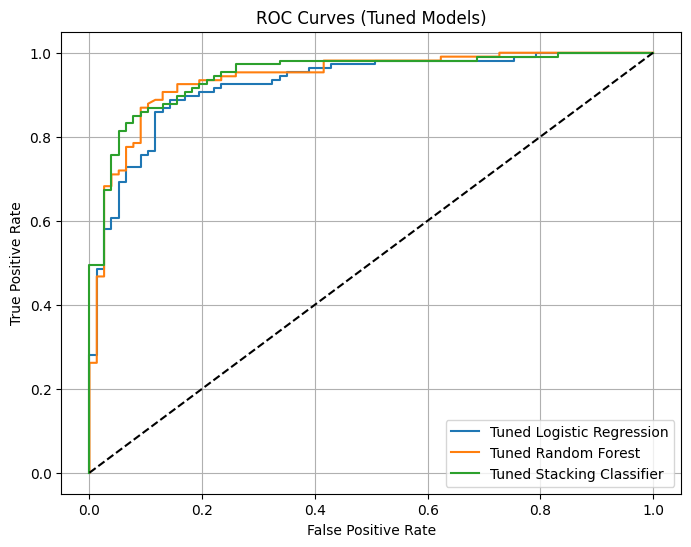

In [40]:
plt.figure(figsize=(8,6))

for name, model in models.items():
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Tuned Models)")
plt.legend()
plt.grid(True)
plt.show()


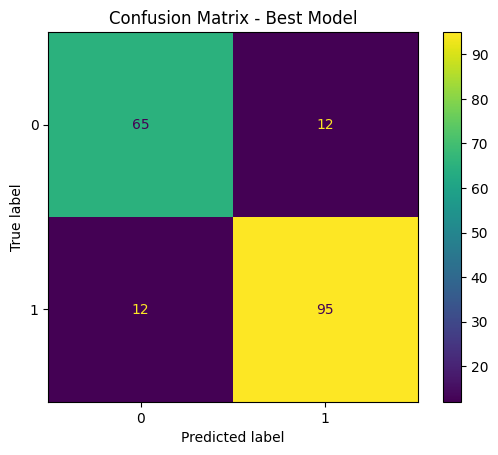

In [41]:
best_model = best_stack
y_pred_best = best_model.predict(x_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Best Model")
plt.show()


Brier Score: 0.09138128297885269


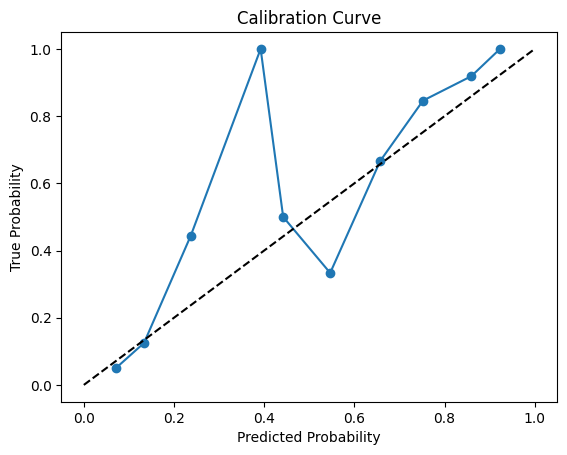

In [42]:
from sklearn.metrics import brier_score_loss

y_proba = best_model.predict_proba(x_test)[:,1]

prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
print("Brier Score:", brier_score_loss(y_test, y_proba))

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.show()


In [43]:
import pickle
with open("heart_disease_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")


Model saved successfully!


In [44]:
import pytesseract
from PIL import Image
from pdf2image import convert_from_path

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [45]:
from pdf2image import convert_from_bytes

POPPLER_PATH = r"C:\Poppler\poppler-25.11.0\Library\bin"


with open("Z615.pdf", "rb") as f:
    pdf_bytes = f.read()

pages = convert_from_bytes(
    pdf_bytes,
    poppler_path=POPPLER_PATH
)

print("Converted pages:", len(pages))


Converted pages: 6
